In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# import seaborn as sns

dataset = pd.read_csv("../data/logfile-v10.csv", delimiter=";")
dataset.head()

,time,datacenter_id,datacenter_name,host_id,type,active,number_of_pes,available_pes,mips,available_mips,...,frequency_range,voltage_range,ram,available_ram,bw,available_bw,storage,available_storage,power_model,vms
0,300.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
1,600.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
2,900.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
3,1200.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."
4,1500.01,2,Datacenter_1,0,host,True,2,0,6000,2387.365877,...,NaN,1.200-1.3375,4000,17.0,10000,9838.0,160000,151000.0,"105.0,112.0,118.0,125.0,131.0,137.0,147.0,153....","2,394.03460741333333,425.0,20.0:2,433.04793488..."


#### Resource Utilization

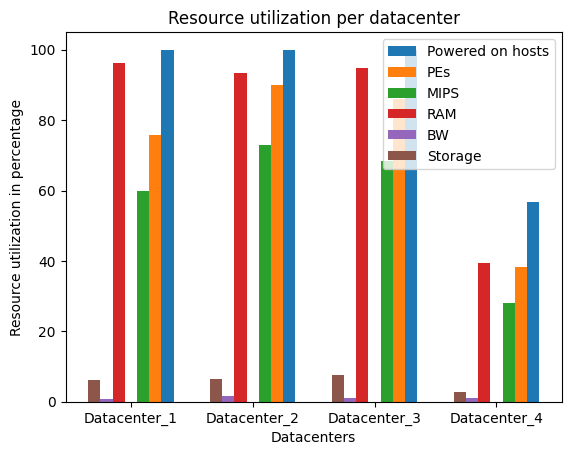

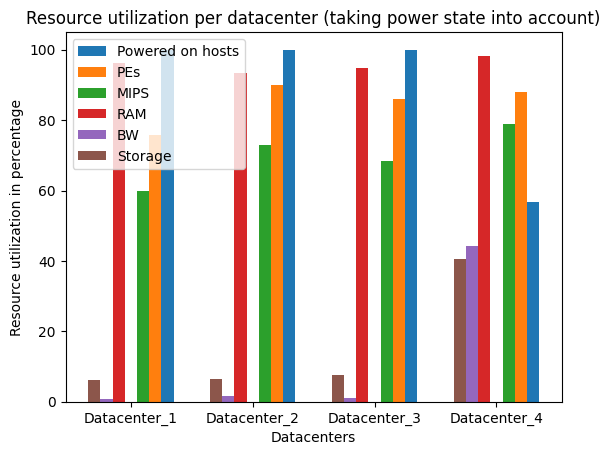

In [3]:
labels = np.unique(dataset['datacenter_name'])
cloud_provider_powered_down_hosts_per_datacenter = np.array([])
cloud_provider_powered_on_hosts_per_datacenter = np.array([])

datacenter_totalPEs = np.array([])
datacenter_availablePEs = np.array([])
datacenter_availablePEs_power = np.array([])
datacenter_totalMIPS = np.array([])
datacenter_availableMIPS = np.array([])
datacenter_availableMIPS_power = np.array([])
datacenter_totalRAM = np.array([])
datacenter_availableRAM = np.array([])
datacenter_availableRAM_power = np.array([])
datacenter_totalBW = np.array([])
datacenter_availableBW = np.array([])
datacenter_availableBW_power = np.array([])
datacenter_totalStorage = np.array([])
datacenter_availableStorage = np.array([])
datacenter_availableStorage_power = np.array([])
for i in range(len(labels)):
    powered_down_hosts = 0
    powered_on_hosts = 0
    
    totalPEs = 0
    availablePEs = 0
    availablePEs_power = 0
    totalMIPS = 0
    availableMIPS = 0
    availableMIPS_power = 0
    totalRAM = 0
    availableRAM = 0
    availableRAM_power = 0
    totalBW = 0
    availableBW = 0
    availableBW_power = 0
    totalStorage = 0
    availableStorage = 0
    availableStorage_power = 0
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        if sample['active'] == False:
            powered_down_hosts += 1
            # availablePEs_power = 0
            # availableMIPS_power = 0
            # availableRAM_power = 0
            # availableBW_power = 0
            # availableStorage_power = 0
        else:
            powered_on_hosts += 1
            availablePEs_power += sample['available_pes']
            availableMIPS_power += sample['available_mips']
            availableRAM_power += sample['available_ram']
            availableBW_power += sample['available_bw']
            availableStorage_power += sample['available_storage']
        
        totalPEs += sample['number_of_pes']
        availablePEs += sample['available_pes']
        
        totalMIPS += sample['mips']
        availableMIPS += sample['available_mips']
        
        totalRAM += sample['ram']
        availableRAM += sample['available_ram']
        
        totalBW += sample['bw']
        availableBW += sample['available_bw']
        
        totalStorage += sample['storage']
        availableStorage += sample['available_storage']
    
    cloud_provider_powered_on_hosts_per_datacenter = np.append(cloud_provider_powered_on_hosts_per_datacenter, powered_on_hosts)
    cloud_provider_powered_down_hosts_per_datacenter = np.append(cloud_provider_powered_down_hosts_per_datacenter, powered_down_hosts)
    
    datacenter_totalPEs = np.append(datacenter_totalPEs, totalPEs)
    datacenter_availablePEs = np.append(datacenter_availablePEs, availablePEs)
    datacenter_totalMIPS = np.append(datacenter_totalMIPS, totalMIPS)
    datacenter_availableMIPS = np.append(datacenter_availableMIPS, availableMIPS)
    datacenter_totalRAM = np.append(datacenter_totalRAM, totalRAM)
    datacenter_availableRAM = np.append(datacenter_availableRAM, availableRAM)
    datacenter_totalBW = np.append(datacenter_totalBW, totalBW)
    datacenter_availableBW = np.append(datacenter_availableBW, availableBW)
    datacenter_totalStorage = np.append(datacenter_totalStorage, totalStorage)
    datacenter_availableStorage = np.append(datacenter_availableStorage, availableStorage)

    datacenter_availablePEs_power = np.append(datacenter_availablePEs_power, availablePEs_power)
    datacenter_availableMIPS_power = np.append(datacenter_availableMIPS_power, availableMIPS_power)
    datacenter_availableRAM_power = np.append(datacenter_availableRAM_power, availableRAM_power)
    datacenter_availableBW_power = np.append(datacenter_availableBW_power, availableBW_power)
    datacenter_availableStorage_power = np.append(datacenter_availableStorage_power, availableStorage_power)
x = np.arange(len(labels))
datacenter_usedPEs = np.subtract(datacenter_totalPEs, datacenter_availablePEs)
datacenter_usedMIPS = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS)
datacenter_usedRAM = np.subtract(datacenter_totalRAM, datacenter_availableRAM)
datacenter_usedBW = np.subtract(datacenter_totalBW, datacenter_availableBW)
datacenter_usedStorage = np.subtract(datacenter_totalStorage, datacenter_availableStorage)

datacenter_usedPEs_power = np.subtract(datacenter_totalPEs, datacenter_availablePEs_power)
datacenter_usedMIPS_power = np.subtract(datacenter_totalMIPS, datacenter_availableMIPS_power)
datacenter_usedRAM_power = np.subtract(datacenter_totalRAM, datacenter_availableRAM_power)
datacenter_usedBW_power = np.subtract(datacenter_totalBW, datacenter_availableBW_power)
datacenter_usedStorage_power = np.subtract(datacenter_totalStorage, datacenter_availableStorage_power)

bar_width = 0.2
plt.bar(x + bar_width + bar_width / 2, np.divide(cloud_provider_powered_on_hosts_per_datacenter, cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter)*100, bar_width/2, label="Powered on hosts")
plt.bar(x + bar_width, np.divide(datacenter_usedPEs, datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(x + bar_width / 2, np.divide(datacenter_usedMIPS, datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(x - bar_width / 2, np.divide(datacenter_usedRAM, datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(x - bar_width, np.divide(datacenter_usedBW, datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(x - bar_width - bar_width / 2, np.divide(datacenter_usedStorage, datacenter_totalStorage)*100, bar_width/2, label="Storage")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter")
plt.legend()
plt.show()

bar_width = 0.2
plt.bar(x + bar_width + bar_width / 2, np.divide(cloud_provider_powered_on_hosts_per_datacenter, cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter)*100, bar_width/2, label="Powered on hosts")
plt.bar(x + bar_width, np.divide(datacenter_usedPEs_power, datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(x + bar_width / 2, np.divide(datacenter_usedMIPS_power, datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(x - bar_width / 2, np.divide(datacenter_usedRAM_power, datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(x - bar_width, np.divide(datacenter_usedBW_power, datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(x - bar_width - bar_width / 2, np.divide(datacenter_usedStorage_power, datacenter_totalStorage)*100, bar_width/2, label="Storage")

plt.xticks(x, labels)
plt.xlabel("Datacenters")
plt.ylabel("Resource utilization in percentage")
plt.title("Resource utilization per datacenter (taking power state into account)")
plt.legend()
plt.show()

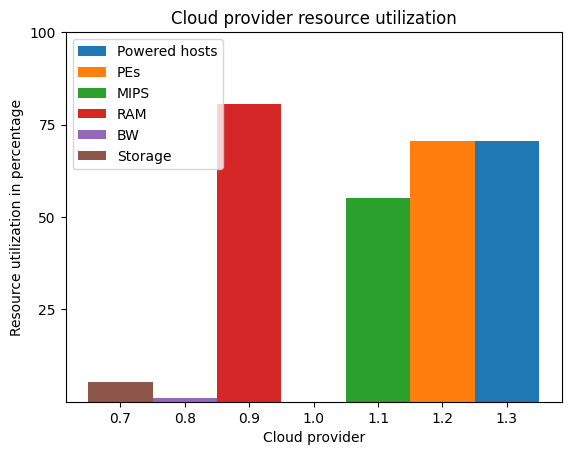

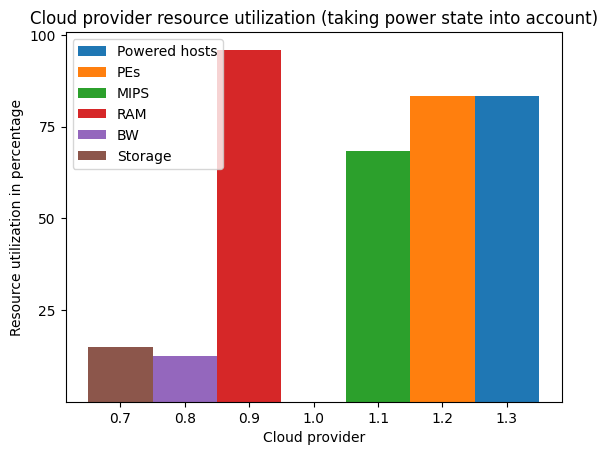

In [4]:
bar_width = 0.2
plt.bar(1 + bar_width + bar_width/2, np.mean(datacenter_usedPEs)/np.mean(datacenter_totalPEs)*100, bar_width/2, label="Powered hosts")
plt.bar(1 + bar_width, np.mean(datacenter_usedPEs)/np.mean(datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(1 + bar_width/2, np.mean(datacenter_usedMIPS)/np.mean(datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(1 - bar_width/2, np.mean(datacenter_usedRAM)/np.mean(datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(1 - bar_width, np.mean(datacenter_usedBW)/np.mean(datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(1 - bar_width - bar_width/2, np.mean(datacenter_usedStorage)/np.mean(totalStorage)*100, bar_width/2, label="Storage")

plt.xlabel("Cloud provider")
plt.ylabel("Resource utilization in percentage")
plt.yticks([25,50,75,100])
plt.title("Cloud provider resource utilization")
plt.legend()
plt.show()

#--------------------------

bar_width = 0.2
plt.bar(1 + bar_width + bar_width/2, np.mean(datacenter_usedPEs_power)/np.mean(datacenter_totalPEs)*100, bar_width/2, label="Powered hosts")
plt.bar(1 + bar_width, np.mean(datacenter_usedPEs_power)/np.mean(datacenter_totalPEs)*100, bar_width/2, label="PEs")
plt.bar(1 + bar_width/2, np.mean(datacenter_usedMIPS_power)/np.mean(datacenter_totalMIPS)*100, bar_width/2, label="MIPS")
plt.bar(1 - bar_width/2, np.mean(datacenter_usedRAM_power)/np.mean(datacenter_totalRAM)*100, bar_width/2, label="RAM")
plt.bar(1 - bar_width, np.mean(datacenter_usedBW_power)/np.mean(datacenter_totalBW)*100, bar_width/2, label="BW")
plt.bar(1 - bar_width - bar_width/2, np.mean(datacenter_usedStorage_power)/np.mean(totalStorage)*100, bar_width/2, label="Storage")

plt.xlabel("Cloud provider")
plt.ylabel("Resource utilization in percentage")
plt.yticks([25,50,75,100])
plt.title("Cloud provider resource utilization (taking power state into account)")
plt.legend()
plt.show()

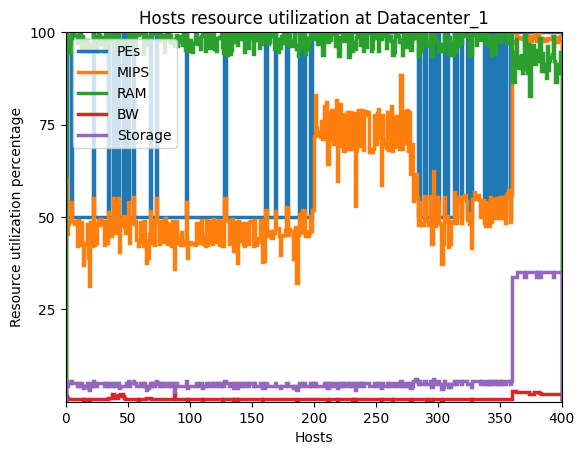

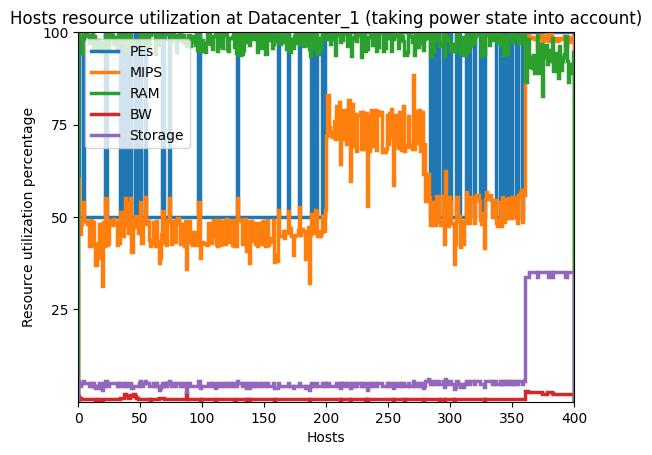

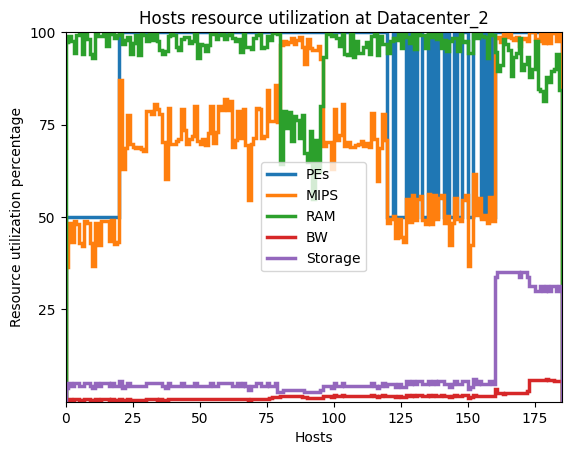

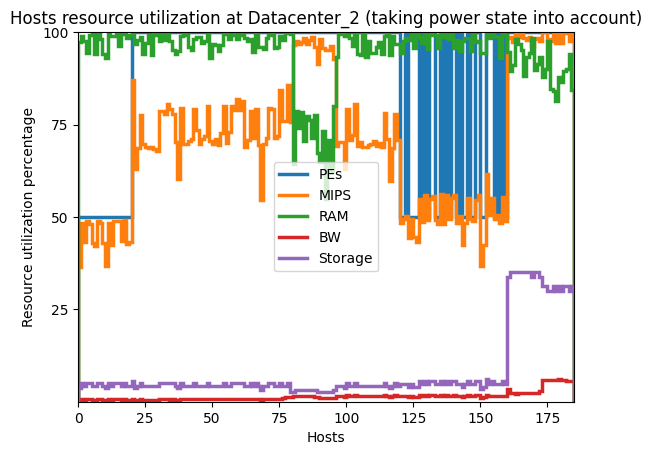

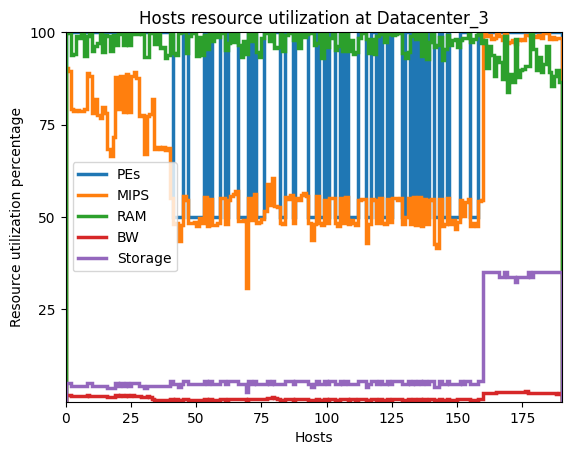

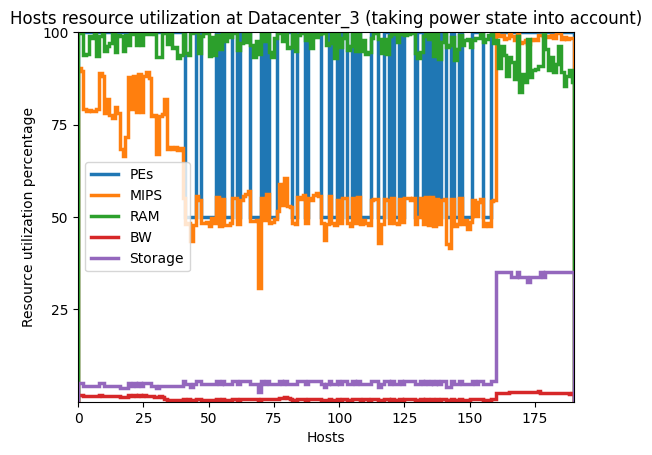

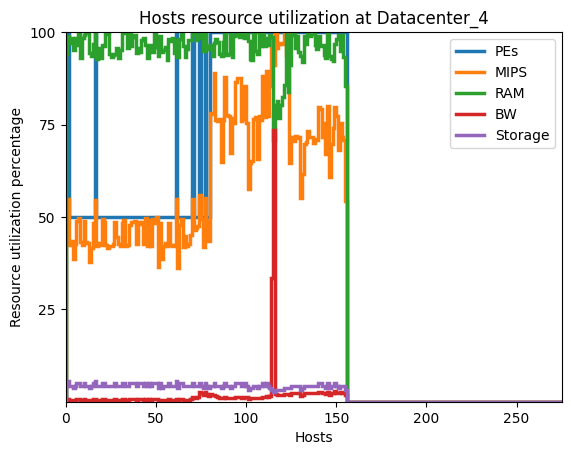

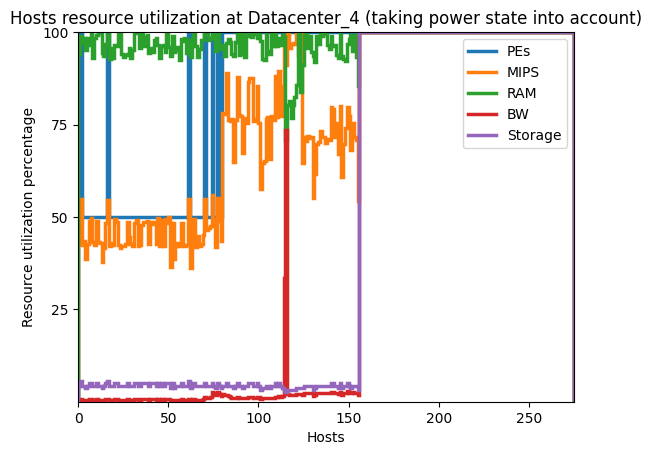

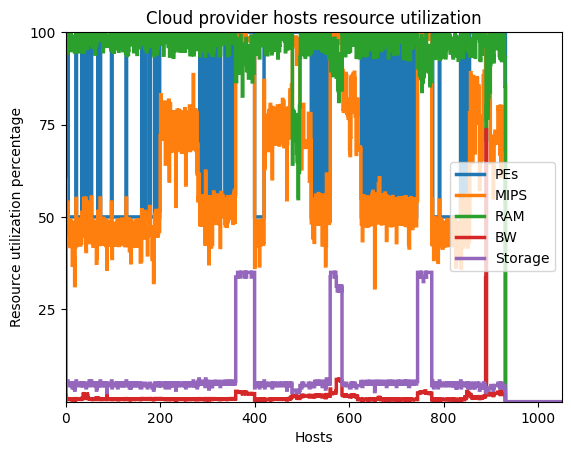

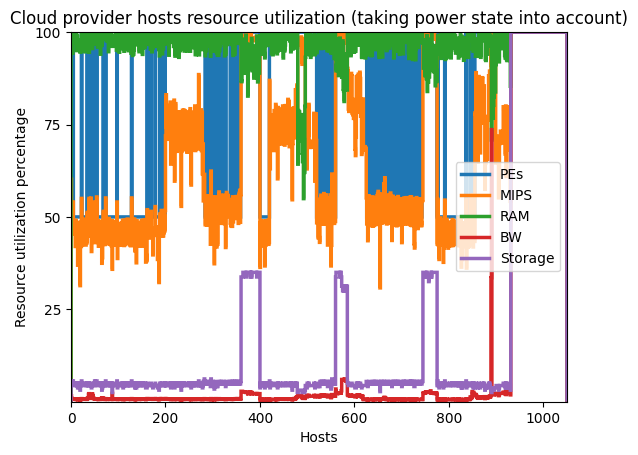

In [5]:
labels = np.unique(dataset['datacenter_name'])

cloud_provider_host_PEs = np.array([])
cloud_provider_host_availablePEs = np.array([])
cloud_provider_host_availablePEs_power = np.array([])

cloud_provider_host_MIPS = np.array([])
cloud_provider_host_availableMIPS = np.array([])
cloud_provider_host_availableMIPS_power = np.array([])

cloud_provider_host_RAM = np.array([])
cloud_provider_host_availableRAM = np.array([])
cloud_provider_host_availableRAM_power = np.array([])

cloud_provider_host_BW = np.array([])
cloud_provider_host_availableBW = np.array([])
cloud_provider_host_availableBW_power = np.array([])

cloud_provider_host_Storage = np.array([])
cloud_provider_host_availableStorage = np.array([])
cloud_provider_host_availableStorage_power = np.array([])

for i in range(len(labels)):
    host_PEs = np.array([])
    host_availablePEs = np.array([])
    host_availablePEs_power = np.array([])
    
    host_MIPS = np.array([])
    host_availableMIPS = np.array([])
    host_availableMIPS_power = np.array([])
    
    host_RAM = np.array([])
    host_availableRAM = np.array([])
    host_availableRAM_power = np.array([])
    
    host_BW = np.array([])
    host_availableBW = np.array([])
    host_availableBW_power = np.array([])
    
    host_Storage = np.array([])
    host_availableStorage = np.array([])
    host_availableStorage_power = np.array([])
    
    for index, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        host_PEs = np.append(host_PEs, sample['number_of_pes'])
        host_availablePEs = np.append(host_availablePEs, sample['available_pes'])
        
        host_MIPS = np.append(host_MIPS, sample['mips'])
        host_availableMIPS = np.append(host_availableMIPS, sample['available_mips'])
        
        host_RAM = np.append(host_RAM, sample['ram'])
        host_availableRAM = np.append(host_availableRAM, sample['available_ram'])
        
        host_BW = np.append(host_BW, sample['bw'])
        host_availableBW = np.append(host_availableBW, sample['available_bw'])
        
        host_Storage = np.append(host_Storage, sample['storage'])
        host_availableStorage = np.append(host_availableStorage, sample['available_storage'])
        
        
        cloud_provider_host_PEs = np.append(cloud_provider_host_PEs, sample['number_of_pes'])
        cloud_provider_host_availablePEs = np.append(cloud_provider_host_availablePEs, sample['available_pes'])
        
        cloud_provider_host_MIPS = np.append(cloud_provider_host_MIPS, sample['mips'])
        cloud_provider_host_availableMIPS = np.append(cloud_provider_host_availableMIPS, sample['available_mips'])
        
        cloud_provider_host_RAM = np.append(cloud_provider_host_RAM, sample['ram'])
        cloud_provider_host_availableRAM = np.append(cloud_provider_host_availableRAM, sample['available_ram'])
        
        cloud_provider_host_BW = np.append(cloud_provider_host_BW, sample['bw'])
        cloud_provider_host_availableBW = np.append(cloud_provider_host_availableBW, sample['available_bw'])
        
        cloud_provider_host_Storage = np.append(cloud_provider_host_Storage, sample['storage'])
        cloud_provider_host_availableStorage = np.append(cloud_provider_host_availableStorage, sample['available_storage'])
        
        if sample['active'] == False:
            host_availablePEs_power = np.append(host_availablePEs_power, 0)
            host_availableMIPS_power = np.append(host_availableMIPS_power, 0)
            host_availableRAM_power = np.append(host_availableRAM_power, 0)
            host_availableBW_power = np.append(host_availableBW_power, 0)
            host_availableStorage_power = np.append(host_availableStorage_power, 0)
            
            cloud_provider_host_availablePEs_power = np.append(cloud_provider_host_availablePEs_power, 0)
            cloud_provider_host_availableMIPS_power = np.append(cloud_provider_host_availableMIPS_power, 0)
            cloud_provider_host_availableRAM_power = np.append(cloud_provider_host_availableRAM_power, 0)
            cloud_provider_host_availableBW_power = np.append(cloud_provider_host_availableBW_power, 0)
            cloud_provider_host_availableStorage_power = np.append(cloud_provider_host_availableStorage_power, 0)
        else:
            host_availablePEs_power = np.append(host_availablePEs_power, sample['available_pes'])
            host_availableMIPS_power = np.append(host_availableMIPS_power, sample['available_mips'])
            host_availableRAM_power = np.append(host_availableRAM_power, sample['available_ram'])
            host_availableBW_power = np.append(host_availableBW_power, sample['available_bw'])
            host_availableStorage_power = np.append(host_availableStorage_power, sample['available_storage'])
            
            cloud_provider_host_availablePEs_power = np.append(cloud_provider_host_availablePEs_power, sample['available_pes'])
            cloud_provider_host_availableMIPS_power = np.append(cloud_provider_host_availableMIPS_power, sample['available_mips'])
            cloud_provider_host_availableRAM_power = np.append(cloud_provider_host_availableRAM_power, sample['available_ram'])
            cloud_provider_host_availableBW_power = np.append(cloud_provider_host_availableBW_power, sample['available_bw'])
            cloud_provider_host_availableStorage_power = np.append(cloud_provider_host_availableStorage_power, sample['available_storage'])
        
    fig, ax = plt.subplots()
    ax.stairs(np.divide(np.subtract(host_PEs, host_availablePEs), host_PEs)*100, linewidth=2.5, label="PEs")
    ax.stairs(np.divide(np.subtract(host_MIPS, host_availableMIPS), host_MIPS)*100, linewidth=2.5, label="MIPS")
    ax.stairs(np.divide(np.subtract(host_RAM, host_availableRAM), host_RAM)*100, linewidth=2.5, label="RAM")
    ax.stairs(np.divide(np.subtract(host_BW, host_availableBW), host_BW)*100, linewidth=2.5, label="BW")
    ax.stairs(np.divide(np.subtract(host_Storage, host_availableStorage), host_Storage)*100, linewidth=2.5, label="Storage")
    ax.set(xlim=(0, len(host_availablePEs)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Hosts")
    plt.title(f"Hosts resource utilization at {sample['datacenter_name']}")
    plt.legend()
    plt.show()
    
    fig, ax = plt.subplots()
    ax.stairs(np.divide(np.subtract(host_PEs, host_availablePEs_power), host_PEs)*100, linewidth=2.5, label="PEs")
    ax.stairs(np.divide(np.subtract(host_MIPS, host_availableMIPS_power), host_MIPS)*100, linewidth=2.5, label="MIPS")
    ax.stairs(np.divide(np.subtract(host_RAM, host_availableRAM_power), host_RAM)*100, linewidth=2.5, label="RAM")
    ax.stairs(np.divide(np.subtract(host_BW, host_availableBW_power), host_BW)*100, linewidth=2.5, label="BW")
    ax.stairs(np.divide(np.subtract(host_Storage, host_availableStorage_power), host_Storage)*100, linewidth=2.5, label="Storage")
    ax.set(xlim=(0, len(host_availablePEs_power)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(host_availablePEs))
    plt.ylabel("Resource utilization percentage")
    plt.xlabel("Hosts")
    plt.title(f"Hosts resource utilization at {sample['datacenter_name']} (taking power state into account)")
    plt.legend()
    plt.show()

fig, ax = plt.subplots()
ax.stairs(np.divide(np.subtract(cloud_provider_host_PEs, cloud_provider_host_availablePEs), cloud_provider_host_PEs)*100, linewidth=2.5, label="PEs")
ax.stairs(np.divide(np.subtract(cloud_provider_host_MIPS, cloud_provider_host_availableMIPS), cloud_provider_host_MIPS)*100, linewidth=2.5, label="MIPS")
ax.stairs(np.divide(np.subtract(cloud_provider_host_RAM, cloud_provider_host_availableRAM), cloud_provider_host_RAM)*100, linewidth=2.5, label="RAM")
ax.stairs(np.divide(np.subtract(cloud_provider_host_BW, cloud_provider_host_availableBW), cloud_provider_host_BW)*100, linewidth=2.5, label="BW")
ax.stairs(np.divide(np.subtract(cloud_provider_host_Storage, cloud_provider_host_availableStorage), cloud_provider_host_Storage)*100, linewidth=2.5, label="Storage")
ax.set(xlim=(0, len(cloud_provider_host_availablePEs)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(cloud_provider_host_availablePEs))
plt.ylabel("Resource utilization percentage")
plt.xlabel("Hosts")
plt.title(f"Cloud provider hosts resource utilization")
plt.legend()
plt.show()

fig, ax = plt.subplots()
ax.stairs(np.divide(np.subtract(cloud_provider_host_PEs, cloud_provider_host_availablePEs_power), cloud_provider_host_PEs)*100, linewidth=2.5, label="PEs")
ax.stairs(np.divide(np.subtract(cloud_provider_host_MIPS, cloud_provider_host_availableMIPS_power), cloud_provider_host_MIPS)*100, linewidth=2.5, label="MIPS")
ax.stairs(np.divide(np.subtract(cloud_provider_host_RAM, cloud_provider_host_availableRAM_power), cloud_provider_host_RAM)*100, linewidth=2.5, label="RAM")
ax.stairs(np.divide(np.subtract(cloud_provider_host_BW, cloud_provider_host_availableBW_power), cloud_provider_host_BW)*100, linewidth=2.5, label="BW")
ax.stairs(np.divide(np.subtract(cloud_provider_host_Storage, cloud_provider_host_availableStorage_power), cloud_provider_host_Storage)*100, linewidth=2.5, label="Storage")
ax.set(xlim=(0, len(cloud_provider_host_availablePEs_power)), ylim=(0,100), yticks=np.array([25,50,75,100])) #xticks=np.arange(1,len(cloud_provider_host_availablePEs))
plt.ylabel("Resource utilization percentage")
plt.xlabel("Hosts")
plt.title(f"Cloud provider hosts resource utilization (taking power state into account)")
plt.legend()
plt.show()

In [6]:
print(f"Out of the {np.sum(cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter)} available hosts {np.sum(cloud_provider_powered_on_hosts_per_datacenter)} are powered on and {np.sum(cloud_provider_powered_down_hosts_per_datacenter)} hosts powered down. (percent: {(np.sum(cloud_provider_powered_on_hosts_per_datacenter)/np.sum(cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter))*100}%)")
print(f"Out of the {np.sum(datacenter_totalPEs)} available CPUs {np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs)} are used. (percent: {((np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs))/np.sum(datacenter_totalPEs))*100}%)")
print(f"Out of the {np.sum(datacenter_totalMIPS)} available MIPS {np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS)} are used. (percent: {((np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS))/np.sum(datacenter_totalMIPS))*100}%)")
print(f"Out of the {np.sum(datacenter_totalRAM)} available RAM {np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM)} are used. (percent: {((np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM))/np.sum(datacenter_totalRAM))*100}%)")
print(f"Out of the {np.sum(datacenter_totalBW)} available bandwidth {np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW)} are used. (percent: {((np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW))/np.sum(datacenter_totalBW))*100}%)")
print(f"Out of the {np.sum(datacenter_totalStorage)} available Storage {np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage)} are used. (percent: {((np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage))/np.sum(datacenter_totalStorage))*100}%)")


Out of the 1050.0 available hosts 931.0 are powered on and 119.0 hosts powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1662.0 are used. (percent: 70.42372881355932%)
Out of the 5954400.0 available MIPS 3289525.4666677765 are used. (percent: 55.2452886381126%)
Out of the 5760000.0 available RAM 4633587.0 are used. (percent: 80.44421874999999%)
Out of the 10500000.0 available bandwidth 113862.0 are used. (percent: 1.0844%)
Out of the 153260000.0 available Storage 8634000.0 are used. (percent: 5.633563878376615%)


In [7]:
for index in range(len(datacenter_totalPEs)):
    print(f"---------- {labels[index]} ----------")
    print(f"Out of the {cloud_provider_powered_on_hosts_per_datacenter[index] + cloud_provider_powered_down_hosts_per_datacenter[index]} available hosts {cloud_provider_powered_on_hosts_per_datacenter[index]} are powered on and {cloud_provider_powered_down_hosts_per_datacenter[index]} hosts powered down. (percent: {(cloud_provider_powered_on_hosts_per_datacenter[index]/(cloud_provider_powered_on_hosts_per_datacenter[index] + cloud_provider_powered_down_hosts_per_datacenter[index]))*100}%)")
    print(f"Out of the {datacenter_totalPEs[index]} available CPUs {datacenter_totalPEs[index] - datacenter_availablePEs[index]} are used. (percent: {((datacenter_totalPEs[index] - datacenter_availablePEs[index])/datacenter_totalPEs[index])*100}%)")
    print(f"Out of the {datacenter_totalMIPS[index]} available MIPS {datacenter_totalMIPS[index] - datacenter_availableMIPS[index]} are used. (percent: {((datacenter_totalMIPS[index] - datacenter_availableMIPS[index])/datacenter_totalMIPS[index])*100}%)")
    print(f"Out of the {datacenter_totalRAM[index]} available RAM {datacenter_totalRAM[index] - datacenter_availableRAM[index]} are used. (percent: {((datacenter_totalRAM[index] - datacenter_availableRAM[index])/datacenter_totalRAM[index])*100}%)")
    print(f"Out of the {datacenter_totalBW[index]} available bandwidth {datacenter_totalBW[index] - datacenter_availableBW[index]} are used. (percent: {((datacenter_totalBW[index] - datacenter_availableBW[index])/datacenter_totalBW[index])*100}%)")
    print(f"Out of the {datacenter_totalStorage[index]} available Storage {datacenter_totalStorage[index] - datacenter_availableStorage[index]} are used. (percent: {((datacenter_totalStorage[index] - datacenter_availableStorage[index])/datacenter_totalStorage[index])*100}%)")


---------- Datacenter_1 ----------
Out of the 400.0 available hosts 400.0 are powered on and 0.0 hosts powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1398612.1843490144 are used. (percent: 59.790192559379896%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)
---------- Datacenter_2 ----------
Out of the 185.0 available hosts 185.0 are powered on and 0.0 hosts powered down. (percent: 100.0%)
Out of the 420.0 available CPUs 378.0 are used. (percent: 90.0%)
Out of the 964800.0 available MIPS 703104.5969366361 are used. (percent: 72.87568376208915%)
Out of the 1040000.0 available RAM 971574.0 are used. (percent: 93.42057692307692%)
Out of the 1850000.0 available bandwidth 27462.0 are used. (

In [8]:
print(f"Host {np.argmin(host_availableBW)} has a bandwidth utilization above 1Gbits at {((host_Storage[np.argmin(host_availableBW)] - host_availableStorage[np.argmin(host_availableBW)]) / host_Storage[np.argmin(host_availableBW)]) * 100}")

Host 115 has a bandwidth utilization above 1Gbits at 2.5


Taking power state into account

In [9]:
print(f"Out of the {np.sum(cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter)} available hosts {np.sum(cloud_provider_powered_on_hosts_per_datacenter)} are powered on and {np.sum(cloud_provider_powered_down_hosts_per_datacenter)} hosts powered down. (percent: {(np.sum(cloud_provider_powered_on_hosts_per_datacenter)/np.sum(cloud_provider_powered_on_hosts_per_datacenter + cloud_provider_powered_down_hosts_per_datacenter))*100}%)")
print(f"Out of the {np.sum(datacenter_totalPEs)} available CPUs {np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs_power)} are used or unavailable. (percent: {((np.sum(datacenter_totalPEs) - np.sum(datacenter_availablePEs_power))/np.sum(datacenter_totalPEs))*100}%)")
print(f"Out of the {np.sum(datacenter_totalMIPS)} available MIPS {np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS_power)} are used or unavailable. (percent: {((np.sum(datacenter_totalMIPS) - np.sum(datacenter_availableMIPS_power))/np.sum(datacenter_totalMIPS))*100}%)")
print(f"Out of the {np.sum(datacenter_totalRAM)} available RAM {np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM_power)} are used or unavailable. (percent: {((np.sum(datacenter_totalRAM) - np.sum(datacenter_availableRAM_power))/np.sum(datacenter_totalRAM))*100}%)")
print(f"Out of the {np.sum(datacenter_totalBW)} available bandwidth {np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW_power)} are used or unavailable. (percent: {((np.sum(datacenter_totalBW) - np.sum(datacenter_availableBW_power))/np.sum(datacenter_totalBW))*100}%)")
print(f"Out of the {np.sum(datacenter_totalStorage)} available Storage {np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage_power)} are used or unavailable. (percent: {((np.sum(datacenter_totalStorage) - np.sum(datacenter_availableStorage_power))/np.sum(datacenter_totalStorage))*100}%)")


Out of the 1050.0 available hosts 931.0 are powered on and 119.0 hosts powered down. (percent: 88.66666666666667%)
Out of the 2360.0 available CPUs 1970.0 are used or unavailable. (percent: 83.47457627118644%)
Out of the 5954400.0 available MIPS 4078005.4666677765 are used or unavailable. (percent: 68.48726096110063%)
Out of the 5760000.0 available RAM 5529587.0 are used or unavailable. (percent: 95.99977430555555%)
Out of the 10500000.0 available bandwidth 1303862.0 are used or unavailable. (percent: 12.417733333333333%)
Out of the 153260000.0 available Storage 23894000.0 are used or unavailable. (percent: 15.59049980425421%)


In [10]:
for index in range(len(datacenter_totalPEs)):
    print(f"---------- {labels[index]} ----------")
    print(f"Out of the {cloud_provider_powered_on_hosts_per_datacenter[index] + cloud_provider_powered_down_hosts_per_datacenter[index]} available hosts {cloud_provider_powered_on_hosts_per_datacenter[index]} are powered on and {cloud_provider_powered_down_hosts_per_datacenter[index]} hosts powered down. (percent: {(cloud_provider_powered_on_hosts_per_datacenter[index]/(cloud_provider_powered_on_hosts_per_datacenter[index] + cloud_provider_powered_down_hosts_per_datacenter[index]))*100}%)")
    print(f"Out of the {datacenter_totalPEs[index]} available CPUs {datacenter_totalPEs[index] - datacenter_availablePEs_power[index]} are used. (percent: {((datacenter_totalPEs[index] - datacenter_availablePEs_power[index])/datacenter_totalPEs[index])*100}%)")
    print(f"Out of the {datacenter_totalMIPS[index]} available MIPS {datacenter_totalMIPS[index] - datacenter_availableMIPS_power[index]} are used. (percent: {((datacenter_totalMIPS[index] - datacenter_availableMIPS_power[index])/datacenter_totalMIPS[index])*100}%)")
    print(f"Out of the {datacenter_totalRAM[index]} available RAM {datacenter_totalRAM[index] - datacenter_availableRAM_power[index]} are used. (percent: {((datacenter_totalRAM[index] - datacenter_availableRAM_power[index])/datacenter_totalRAM[index])*100}%)")
    print(f"Out of the {datacenter_totalBW[index]} available bandwidth {datacenter_totalBW[index] - datacenter_availableBW_power[index]} are used. (percent: {((datacenter_totalBW[index] - datacenter_availableBW_power[index])/datacenter_totalBW[index])*100}%)")
    print(f"Out of the {datacenter_totalStorage[index]} available Storage {datacenter_totalStorage[index] - datacenter_availableStorage_power[index]} are used. (percent: {((datacenter_totalStorage[index] - datacenter_availableStorage_power[index])/datacenter_totalStorage[index])*100}%)")


---------- Datacenter_1 ----------
Out of the 400.0 available hosts 400.0 are powered on and 0.0 hosts powered down. (percent: 100.0%)
Out of the 880.0 available CPUs 667.0 are used. (percent: 75.79545454545455%)
Out of the 2339200.0 available MIPS 1398612.1843490144 are used. (percent: 59.790192559379896%)
Out of the 2080000.0 available RAM 2000663.0 are used. (percent: 96.18572115384615%)
Out of the 4000000.0 available bandwidth 36094.0 are used. (percent: 0.90235%)
Out of the 59680000.0 available Storage 3767000.0 are used. (percent: 6.311997319034853%)
---------- Datacenter_2 ----------
Out of the 185.0 available hosts 185.0 are powered on and 0.0 hosts powered down. (percent: 100.0%)
Out of the 420.0 available CPUs 378.0 are used. (percent: 90.0%)
Out of the 964800.0 available MIPS 703104.5969366361 are used. (percent: 72.87568376208915%)
Out of the 1040000.0 available RAM 971574.0 are used. (percent: 93.42057692307692%)
Out of the 1850000.0 available bandwidth 27462.0 are used. (

##### Max Power

The datacenter 'Datacenter_1' current computing infrastructure at max can consume 63.96 kW per hour


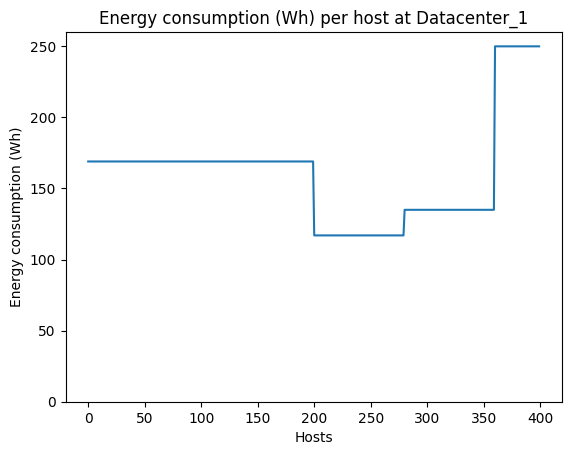

The datacenter 'Datacenter_2' current computing infrastructure at max can consume 26.73 kW per hour


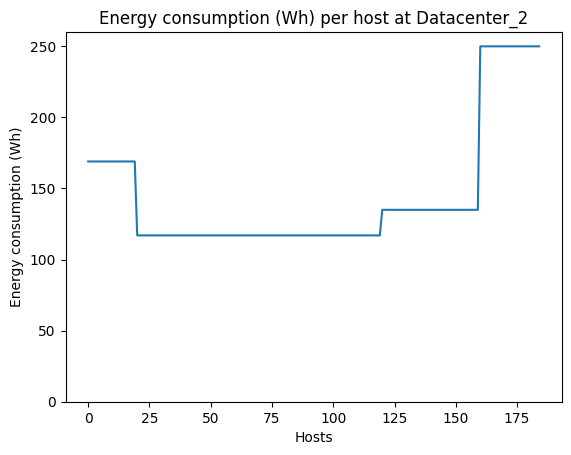

The datacenter 'Datacenter_3' current computing infrastructure at max can consume 28.38 kW per hour


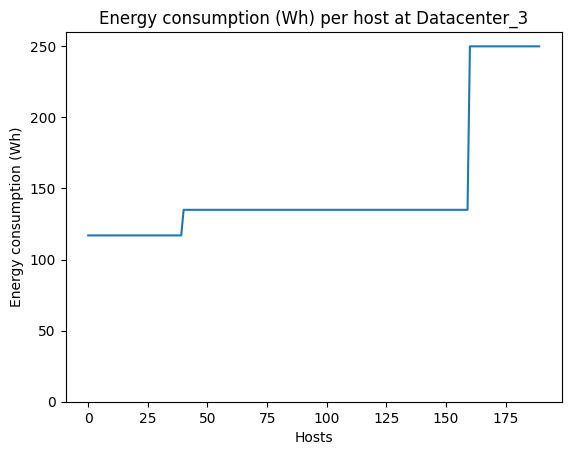

The datacenter 'Datacenter_4' current computing infrastructure at max can consume 42.25 kW per hour


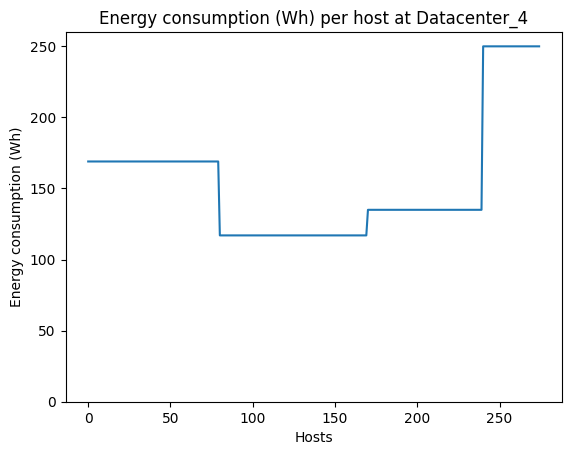

The cloud providers current computing infrastructure at max can consume 161.32 kW per hour


In [11]:
labels= np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_host = np.array([])
max_power_per_datacenter = np.array([])
for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        # max_power_per_datacenter += float(power_model[-2])
        max_power_per_host = np.append(max_power_per_host, float(power_model[-2]))
        max_power_per_host_per_datacenter = np.append(max_power_per_host_per_datacenter, float(power_model[-2]))
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_host_per_datacenter))
    max_power += np.sum(max_power_per_host_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure at max can consume {(np.sum(max_power_per_host_per_datacenter) * 1)/1000} kW per hour")
    plt.plot(np.arange(0, len(max_power_per_host_per_datacenter)), (max_power_per_host_per_datacenter*1))
    plt.ylim((0, max(max_power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)/1000} kW per hour")

##### Current Power

The datacenter 'Datacenter_1' current computing infrastructure is consuming [54.91926502] kilo watts per hour


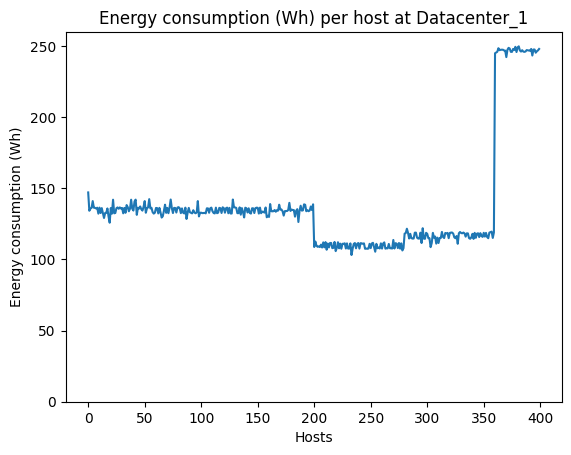

The datacenter 'Datacenter_2' current computing infrastructure is consuming [54.91926502 24.54640903] kilo watts per hour


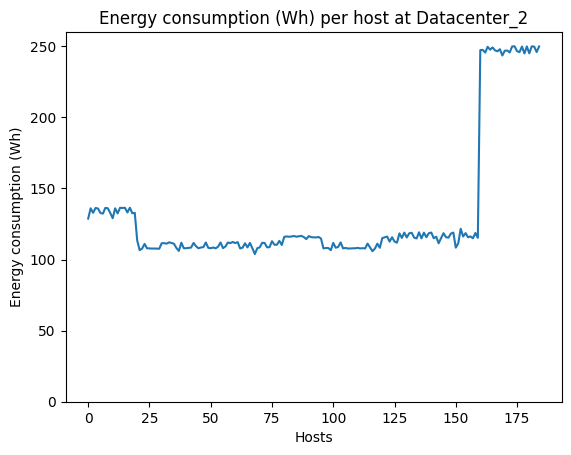

The datacenter 'Datacenter_3' current computing infrastructure is consuming [54.91926502 24.54640903 25.84740443] kilo watts per hour


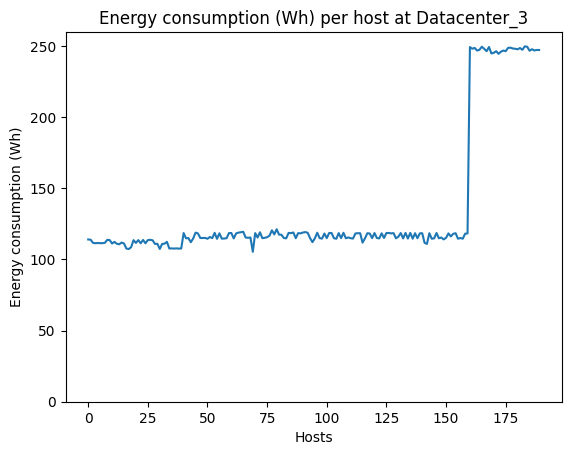

The datacenter 'Datacenter_4' current computing infrastructure is consuming [54.91926502 24.54640903 25.84740443 19.1557249 ] kilo watts per hour


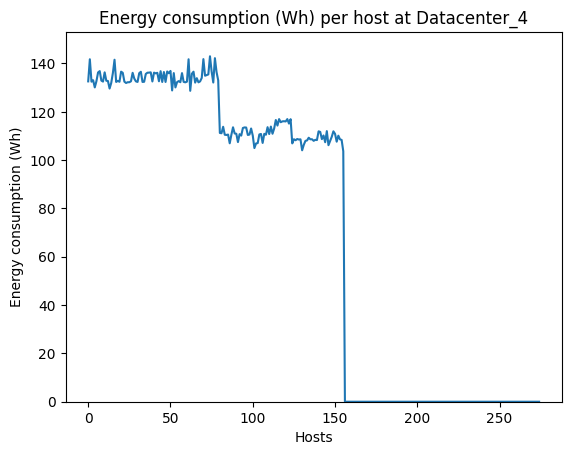

The cloud providers current computing infrastructure at max can consume 124.46880337884019 kilo watts per hour


In [12]:
labels= np.unique(dataset['datacenter_name'])
power = 0
power_per_host = np.array([])
power_per_datacenter = np.array([])
for i in range(len(labels)):
    # power_per_datacenter = 0
    power_per_host_per_datacenter = np.array([])
    for _, sample in dataset[(dataset['datacenter_name'] == labels[i]) & (dataset['time'] == 300.01)].iterrows():
        power_model = sample['power_model'].split(",")
        utilization = (sample['mips'] - sample['available_mips'])/sample['mips']
        if sample['active'] == False:
            power_per_host = np.append(power_per_host, 0)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, 0)
        elif utilization % 0.1 == 0:
            host_power = power_model[utilization * 10]
            # power_per_datacenter += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
        else:
            utilization_floor = int(math.floor(utilization * 10))
            utilization_ceil = int(math.ceil(utilization * 10))
            power_floor = float(power_model[utilization_floor])
            power_ceil = float(power_model[utilization_ceil])
            
            diff = (power_ceil - power_floor) / 10
            host_power = power_floor + diff * (utilization - utilization_floor / 10) * 100
            
            # power_per_datacenter += host_power
            power_per_host = np.append(power_per_host, host_power)
            power_per_host_per_datacenter = np.append(power_per_host_per_datacenter, host_power)
    power_per_datacenter = np.append(power_per_datacenter, np.sum(power_per_host_per_datacenter))
    power += np.sum(power_per_host_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current computing infrastructure is consuming {(power_per_datacenter * 1)/1000} kilo watts per hour")
    plt.plot(np.arange(0, len(power_per_host_per_datacenter)), (power_per_host_per_datacenter*1))
    
    plt.ylim((0, max(power_per_host_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (Wh)")
    plt.title(f"Energy consumption (Wh) per host at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(power * 1)/1000} kilo watts per hour")

In [13]:
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(power_per_datacenter)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(power_per_datacenter)}W")
print(f"The cloud provider is thus using {(np.sum(power_per_datacenter) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(power_per_datacenter)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print()
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(power_per_datacenter) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(power_per_datacenter) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(power_per_datacenter)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")

The maximum power consumption for the cloud provider is 161320.0W
The current power consumption for the cloud provider is 124468.8033788402W
The cloud provider is saving 36851.196621159805W
The cloud provider is thus using 77.15646130600061% of their full power consumption.
The cloud provider is thus using 22.84353869399938% of their full power consumption.

The maximum energy consumption for the cloud provider is 161.32kJ/s
The current energy consumption for the cloud provider is 124.46880337884019kJ/s
The cloud provider is saving 36.8511966211598kJ/s
The cloud provider is thus using 77.15646130600062% of their full energy consumption (kJ/s).
The cloud provider is saving 22.843538693999385% energy (kJ/s).


In [14]:
for index in range(len(datacenter_totalPEs)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the data center is {power_per_datacenter[index]}W")
    print(f"The data center is saving {max_power_per_datacenter[index] - power_per_datacenter[index]}W")
    print(f"The data center is thus using {(power_per_datacenter[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The data center is thus using {((max_power_per_datacenter[index] - power_per_datacenter[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print(f"The maximum energy consumption for the data center is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the data center is {(power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The data center is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((power_per_datacenter[index] * 1) / 1000)}kJ/s")
    print(f"The data center is thus using {(((power_per_datacenter[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The data center is saving {((((max_power_per_datacenter[index] - power_per_datacenter[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 63960.0W
The current power consumption for the data center is 54919.26502273205W
The data center is saving 9040.734977267952W
The data center is thus using 85.86501723378994% of their full power consumption.
The data center is thus using 14.134982766210054% of their full power consumption.

The maximum energy consumption for the data center is 63.96kJ/s
The current energy consumption for the data center is 54.91926502273205kJ/s
The data center is saving 9.040734977267952kJ/s
The data center is thus using 85.86501723378994% of their full energy consumption (kJ/s).
The data center is saving 14.134982766210058% energy (kJ/s).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 26730.0W
The current power consumption for the data center is 24546.409025291636W
The data center is saving 2183.5909747083642W
The data center is thus using 91.83093537333197% of their full p

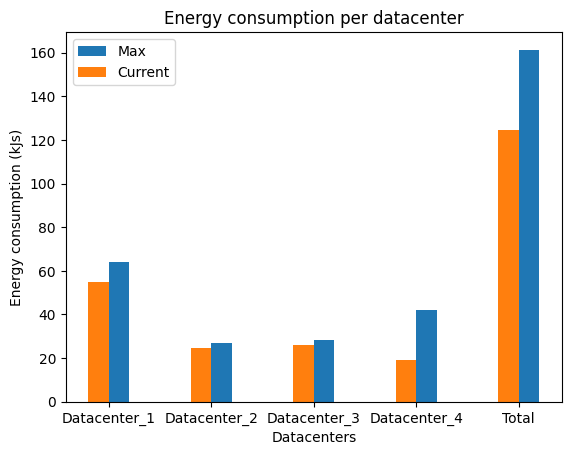

In [15]:
bar_width = 0.2
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width / 2, (np.append(max_power_per_datacenter, np.sum(max_power_per_datacenter)) * 1) / 1000, bar_width, label="Max")
plt.bar(x - bar_width / 2, (np.append(power_per_datacenter, np.sum(power_per_datacenter)) * 1) / 1000, bar_width, label="Current")
plt.xticks(x, np.append(labels, "Total"))
plt.xlabel("Datacenters")
plt.ylabel("Energy consumption (kJs)")
plt.title("Energy consumption per datacenter")
plt.legend()
plt.show()


### Power consumption over 24 hours

In [26]:
print(f"The maximum power consumption for the cloud provider is {(np.sum(max_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption for the cloud provider is {(np.sum(power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption each hour for the cloud provider is {(np.sum(power_per_datacenter)*60*60) / 1000}kWh")
print(f"The cloud provider is saving {(np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(power_per_datacenter)*24*60*60)/1000}kW")
print(f"The cloud provider is saving per hour {(np.sum(max_power_per_datacenter)*60*60)/1000 - (np.sum(power_per_datacenter)*60*60)/1000}kWh")
print(f"The cloud provider is thus using {((np.sum(power_per_datacenter)*24*60*60)/1000 / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% of their full power consumption.")
print(f"The data center is saving {((((np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(power_per_datacenter)*24*60*60)/1000)) / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% power (kWh).")

The maximum power consumption for the cloud provider is 13938048.0kW
The current power consumption for the cloud provider is 10754104.611931792kW
The current power consumption each hour for the cloud provider is 448087.6921638247kWh
The cloud provider is saving 3183943.3880682085kW
The cloud provider is saving per hour 132664.3078361753kWh
The cloud provider is thus using 7.71564613060006e-05% of their full power consumption.
The data center is saving 2.2843538693999393e-05% power (kWh).


In [27]:
for index in range(len(datacenter_totalPEs)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(max_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(power_per_datacenter[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(max_power_per_datacenter[index]*24*60*60) / 1000 - (power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(max_power_per_datacenter[index]*60*60) / 1000 - (power_per_datacenter[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((power_per_datacenter[index]*24*60*60) / 1000 / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((max_power_per_datacenter[index]*24*60*60) / 1000 - (power_per_datacenter[index]*24*60*60) / 1000) / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 5526144.0kW
The current power consumption for the data center is 4745024.49796405kW
The current power consumption each hour for the cloud provider is 197709.35408183536kWh
The data center is saving 781119.5020359503kW
The data center is saving per hour 32546.645918164635kWh
The data center is thus using 8.586501723378996e-05% of their full power consumption.
The data center is saving 1.4134982766210041e-05% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 2309472.0kW
The current power consumption for the data center is 2120809.7397851977kW
The current power consumption each hour for the cloud provider is 88367.07249104988kWh
The data center is saving 188662.26021480234kW
The data center is saving per hour 7860.927508950117kWh
The data center is thus using 9.183093537333198e-05% of their full power consumption.
The data center is saving 8.169064